In [1]:
%matplotlib qt

ImportError: Failed to import any of the following Qt binding modules: PyQt6, PySide6, PyQt5, PySide2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Simula una serie temporal diaria de 1 año
days = 365
t = np.arange(days)
serie1 = np.sin(2 * np.pi * t / 30) + np.random.normal(0, 0.2, days)  # Ejemplo de serie principal
serie2 = np.cos(2 * np.pi * t / 15) + np.random.normal(0, 0.2, days)  # Ejemplo de serie secundaria

In [2]:

#!pip install PySide6

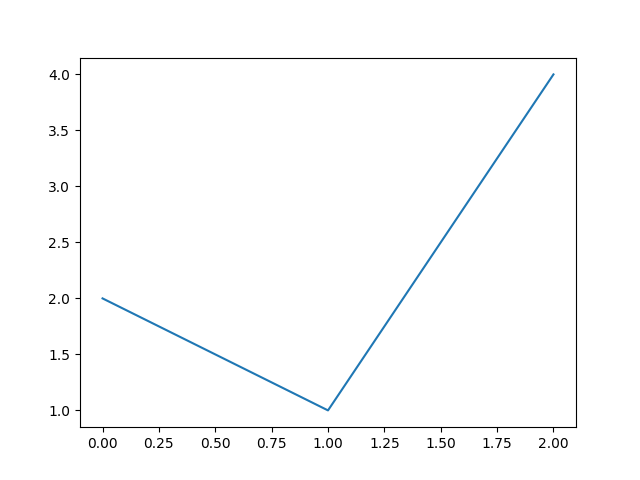

In [3]:
plt.plot([2,1,4])
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import datetime

# Parametros simulados
N_dias = 3
puntos_por_dia = 86400
total_puntos = N_dias * puntos_por_dia

# Simula el array de tiempo segundo a segundo
start_dt = datetime.datetime(2023, 1, 1)
time_array = np.array([start_dt + datetime.timedelta(seconds=i) for i in range(total_puntos)])

# Series simuladas
serie1 = np.sin(np.linspace(0, 20 * np.pi, total_puntos)) + np.random.normal(0, 0.2, total_puntos)
serie2 = np.cos(np.linspace(0, 38 * np.pi, total_puntos)) + np.random.normal(0, 0.2, total_puntos)

seleccionados = []
estado = {
    "dia_actual": 0,
    "punto_seleccionado": None
}

def plot_day(dia):
    ax1.clear()
    ax2.clear()

    ini = dia * puntos_por_dia
    fin = ini + puntos_por_dia

    t_day = time_array[ini:fin]
    y1_day = serie1[ini:fin]
    y2_day = serie2[ini:fin]

    # Plot principal
    ax1.plot(t_day, y1_day, '-', color="gray", alpha=0.7)
    ax1.set_title(f"Serie principal - Día {dia+1}")
    ax1.set_xlim(t_day[0], t_day[-1])
    ax1.set_ylim(serie1.min()-0.5, serie1.max()+0.5)

    # Si hay punto seleccionado para este día, dibuja
    if estado["punto_seleccionado"] is not None:
        xsel, ysel = estado["punto_seleccionado"]
        ax1.plot([xsel], [ysel], 'bo', markersize=10, label="Seleccionado")
        ax1.legend()

    # Plot secundario
    ax2.plot(t_day, y2_day, '-', color="teal", alpha=0.7)
    ax2.set_title(f"Serie secundaria - Día {dia+1}")
    ax2.set_xlim(ax1.get_xlim())
    ax2.set_ylim(serie2.min()-0.5, serie2.max()+0.5)

    fig.autofmt_xdate()
    fig.canvas.draw()

def onclick(event):
    if event.inaxes == ax1:
        dia = estado["dia_actual"]
        x = event.xdata
        y = event.ydata
        # Para obtener el datetime real más cercano al click:
        ini = dia * puntos_por_dia
        fin = ini + puntos_por_dia
        t_day = time_array[ini:fin]
        # Busca el índice más cercano
        if x is not None:
            idx = np.abs([plt.date2num(dt) - x for dt in t_day]).argmin()
            x_nearest = t_day[idx]
            y_nearest = serie1[ini + idx]
            estado["punto_seleccionado"] = (x_nearest, y_nearest)
            plot_day(dia)

def onkey(event):
    if event.key == "right":
        if estado["dia_actual"] < N_dias - 1:
            estado["dia_actual"] += 1
            estado["punto_seleccionado"] = None
            plot_day(estado["dia_actual"])
    elif event.key == "left":
        if estado["dia_actual"] > 0:
            estado["dia_actual"] -= 1
            estado["punto_seleccionado"] = None
            plot_day(estado["dia_actual"])
    elif event.key == "enter":
        dia = estado["dia_actual"]
        if estado["punto_seleccionado"] is not None:
            seleccionados.append((dia, *estado["punto_seleccionado"]))
            print(f"Punto registrado: Día {dia+1}, {estado['punto_seleccionado'][0]}, y={estado['punto_seleccionado'][1]:.2f}")

# Inicializa el plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)
fig.suptitle("Selección interactiva de fenómenos (por segundo)")

plot_day(0)

# Conecta eventos
cid_click = fig.canvas.mpl_connect('button_press_event', onclick)
cid_key = fig.canvas.mpl_connect('key_press_event', onkey)

plt.show()

# Guardar selecciones a CSV (descomentar si lo necesitas)
# import pandas as pd
# df = pd.DataFrame(seleccionados, columns=["dia", "datetime", "y"])
# df.to_csv("selecciones.csv", index=False)

In [2]:
import PyQt5
print("PyQt5 version:", PyQt5.QtCore.PYQT_VERSION_STR)
print("Qt version used by PyQt5:", PyQt5.QtCore.QT_VERSION_STR)

PyQt5 version: 5.15.11
Qt version used by PyQt5: 5.15.14


In [3]:
%matplotlib qt

ImportError: libGL.so.1: cannot open shared object file: No such file or directory